In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

np.random.seed(17)

## Momentum
- helps accelerating SGD in the relevant direction and dampens oscillations 
- Saves previous update vectors and uses $\gamma$ to add a fraction of the previous gradients to the current update vector
- weight update is then as follows $$ v_t = \gamma*v_{t-1}+\eta*\nabla_w L(w) \\ w=w-v_t$$
## Nesterov Momentum
- however blindly following the gradient direction is not enough. It would be also great to know to slow down before the local minima 
- Nesterov momentum "looks ahead" and calculates the gradient if we would take a step in that direction. In case we would jump somewhere that is near to the local minima then this update will be a lot smaller than with normal momentum
- the update rules becomes $$v_t = \gamma*v_{t-1}+\eta*\nabla_w L(w-v_{t-1}) \\ w=w-v_t$$

In [141]:
f = lambda x: -x*np.sin(x)
def df(f,x,eps=1e-9):
    return (f(x+eps)-f(x-eps))/ (2*eps)

def plot(f,x_min=-1,x_max=1):
    x = np.linspace(x_min,x_max,100)
    plt.plot(x,f(x))
def plot_gradients(x,f,label):
    plt.scatter(x,f(np.array(x)),label=label)
    for i,xi in enumerate(x):
        plt.annotate(f"x{i}",(xi,f(xi)),(xi,f(xi)+0.15))

print(f(1))
print(df(f,1))



-0.8414709848078965
-1.3817733623966433


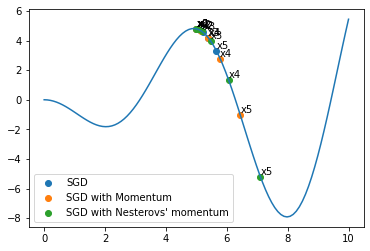

In [142]:
EPOCHS = 5
w = 5
w_momentum = w
w_nesterov = w
gradients = [w]
gradients_momentum =[w_momentum]
gradients_nesterov =[w_nesterov]
learning_rate = 0.1

v = 0
v_nesterov = 0
gamma = 0.999
gamma_nesterov = 0.9
for epoch in range(EPOCHS):
    g = df(f,w)
    # Nesterov
    v_nesterov = gamma_nesterov*v_nesterov+learning_rate*df(f,w-gamma_nesterov*v_nesterov)
    w_nesterov -= v_nesterov
    gradients_nesterov.append(w_nesterov)

    # Momentum
    v = gamma*v +learning_rate*g
    w_momentum -= v
    gradients_momentum.append(w_momentum)

    # SGD
    w -= learning_rate*g
    gradients.append(w)
plot(f,0,10)
plot_gradients(gradients,f,"SGD")
plot_gradients(gradients_momentum,f,"SGD with Momentum")
plot_gradients(gradients_nesterov,f,"SGD with Nesterovs' momentum")
plt.legend()




In [139]:
with open("sgd.pkl","wb") as f:
    pickle.dump(gradients,f)
with open("sgd_momentum.pkl","wb") as f:
    pickle.dump(gradients_momentum,f)
with open("sgd_nesterov.pkl","wb") as f:
    pickle.dump(gradients_nesterov,f)
